In [30]:
#importing required libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [21]:
#reading dataset into jupyter and assigning column names to it
dataset=pd.read_csv('auto-mpg (1).csv')
dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [23]:
dataset['horsepower'].isnull().sum()

0

In [24]:
dataset['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [60]:
dataset['origin'].unique()

array([1, 3, 2], dtype=int64)

In [25]:
dataset['horsepower'] = dataset['horsepower'].replace('?', np.NaN).astype(np.float)

In [26]:
dataset['horsepower'].isnull().sum()

6

In [27]:
dataset['horsepower'].fillna(dataset['horsepower'].mean(), inplace = True)

In [28]:
dataset['horsepower'].isnull().sum()

0

<AxesSubplot:>

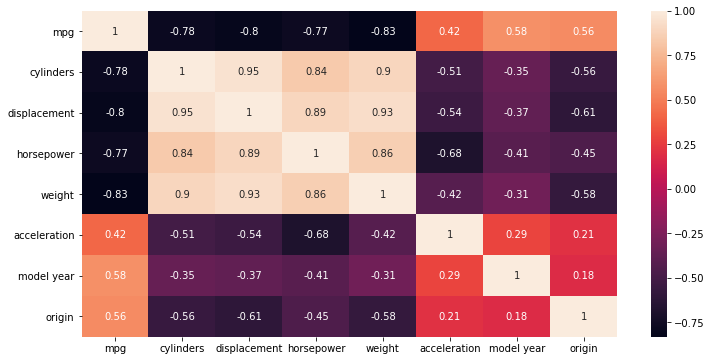

In [31]:
#let's see the correlation between the features by a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(), annot = True)

Text(0.5, 1.0, 'Origin Distribution')

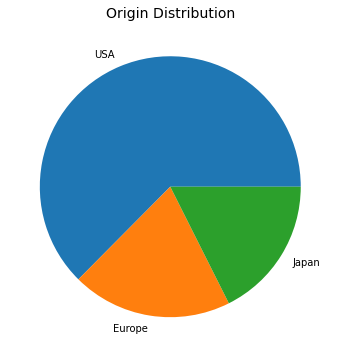

In [68]:
plt.figure(figsize=[14, 6])
plt.pie(x=dataset['origin'].value_counts(),labels=['USA', 'Europe', 'Japan'])
plt.title("Origin Distribution", fontsize=14)

Text(0.5, 1.0, 'Consumption Gallon by Years')

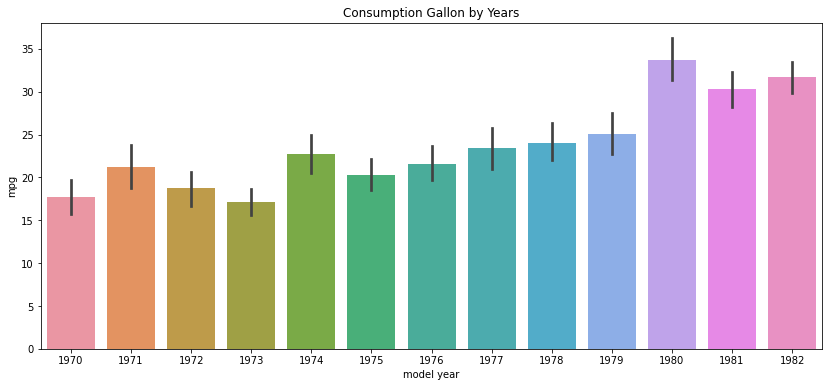

In [70]:
plt.figure(figsize=[14, 6])
sns.barplot(x=dataset['model year']+1900, y=dataset['mpg'])
plt.title('Consumption Gallon by Years')

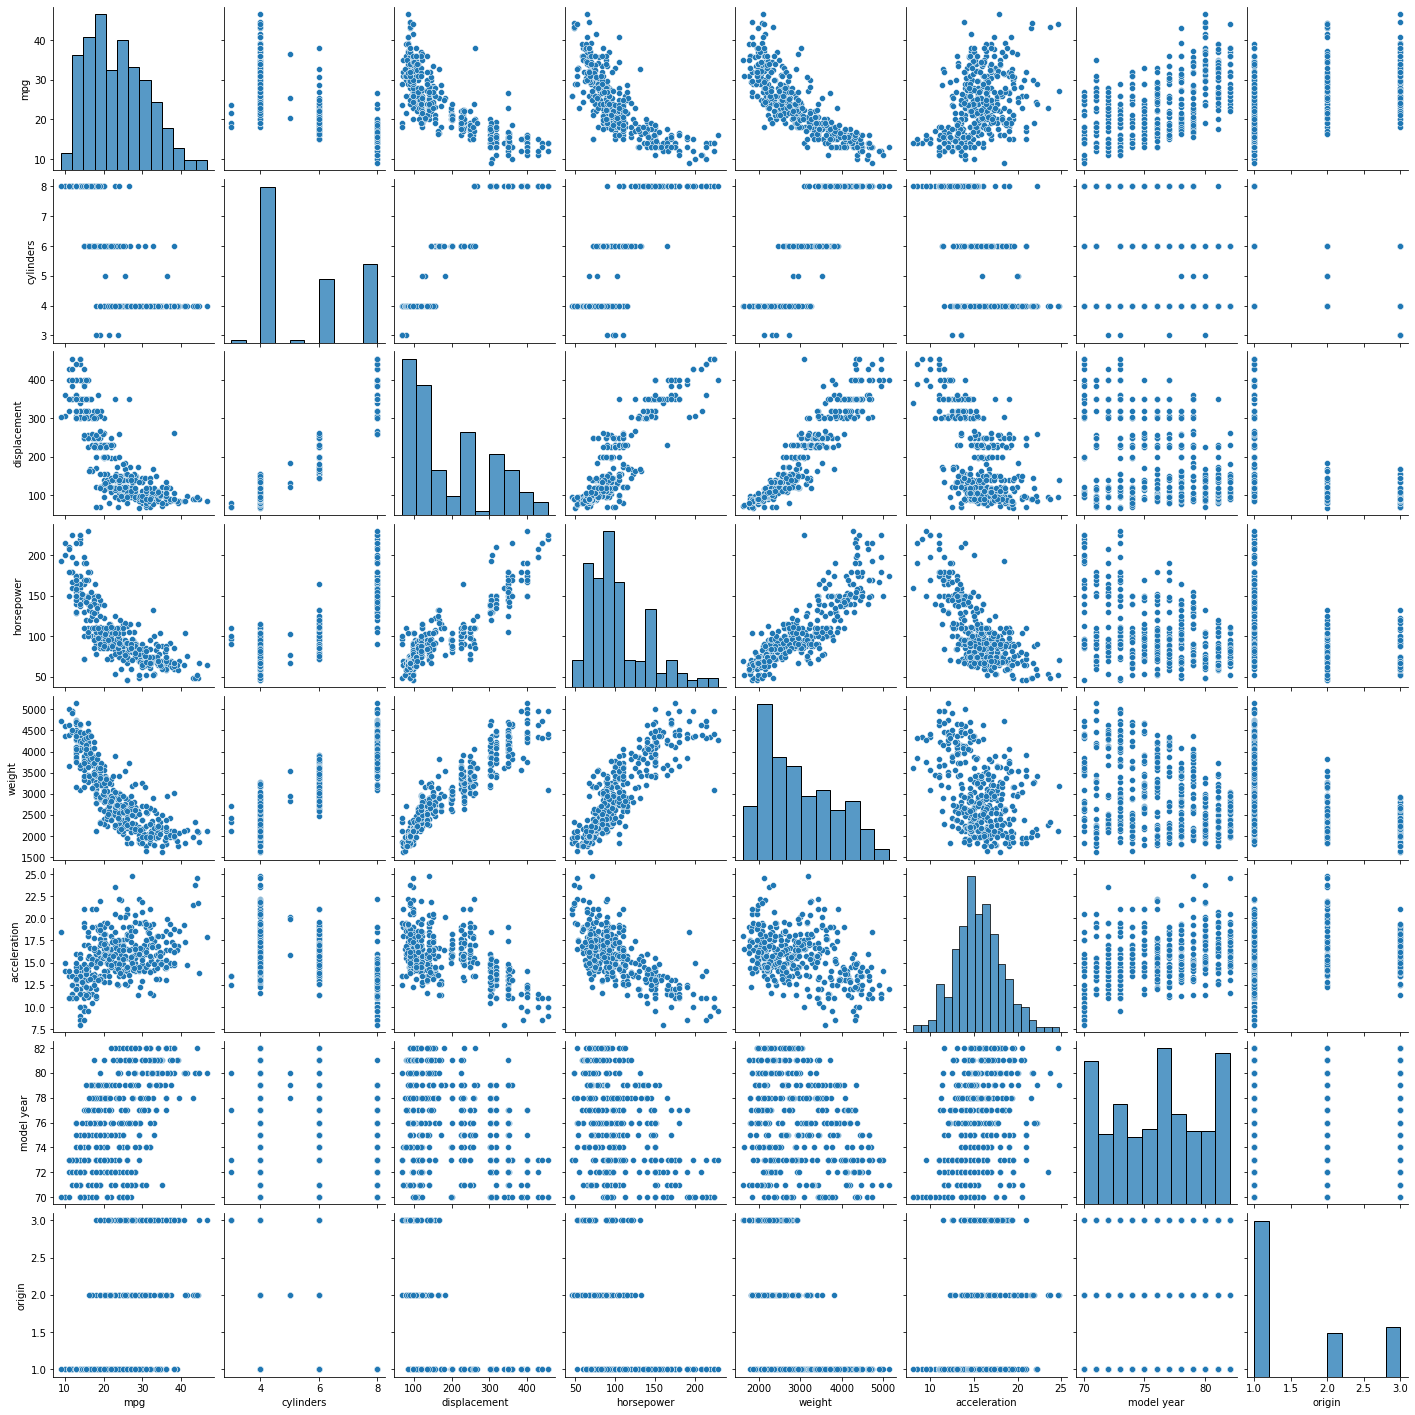

In [32]:
sns.pairplot(dataset)

In [36]:
dataset.drop('car name', axis = 1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


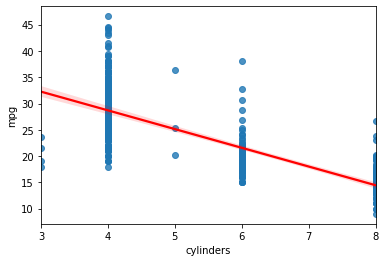

In [54]:
sns.regplot(x='cylinders', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

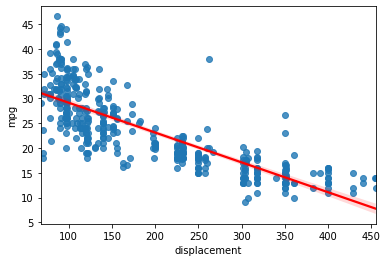

In [55]:
sns.regplot(x='displacement', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

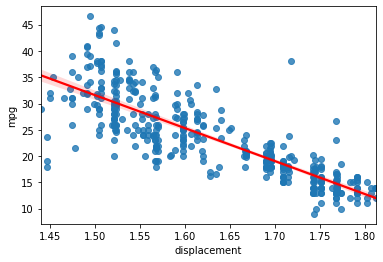

In [57]:
#scatters seem have non linearity.. we can log transformation to make relation Linear
dataset['displacement'] = np.log(dataset['displacement'])
sns.regplot(x='displacement', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

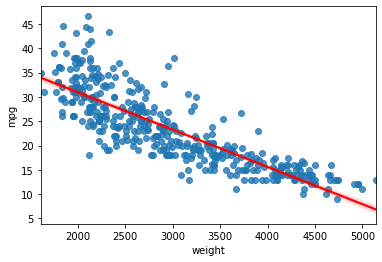

In [58]:
sns.regplot(x='weight', y='mpg',data=dataset, line_kws={"color": "red"})
#plt.plot(scatter_kws='r')
plt.show()

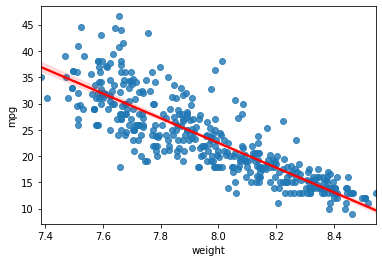

In [59]:
dataset['weight'] = np.log(dataset['weight']) 
sns.regplot(x='weight', y='mpg',data=dataset, line_kws={"color": "red"})
plt.show()

In [48]:
X = dataset[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
y = dataset[['mpg']]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

In [50]:
Linear_Model = LinearRegression()
Linear_Model.fit(X_train, y_train)
y_predict = Linear_Model.predict(X_test)

In [51]:
print(r2_score(y_test, y_predict))

0.8469962763062653


In [53]:
tree_model = DecisionTreeRegressor(criterion='mse', max_depth = 5)
tree_model.fit(X,y)
#print('tree model score: ',tree_model.score(X_all_train, y_all_train))
print('tree model r2 score: ', r2_score(y_test, y_predict))

tree model r2 score:  0.8469962763062653
